# <div align="center">Caso 1 - agrupamiento</div>


Ustedes hacen parte del equipo de análisis de la información de una empresa de retail. La organización está implementando una nueva aplicación que según el equipo de diseño está en
capacidad de atraer una mayor cantidad de usuarios, siempre y cuando se establezcan medidas de comunicación y promoción diferencial dependiendo del tipo de cliente. Ustedes deciden entonces implementar un modelo de datos que les permita diferenciar los clientes según su comportamiento actual.

El equipo de mercadeo de la compañía está seguro que los clientes pueden dividirse en 3 grupos.
Por medio del modelamiento confirme o rechace esta hipótesis.

El conjunto de datos cuenta con el siguiente diccionario:

- ID: identificador del cliente en la fuente de datos
- Year_Birth: Año de nacimiento del cliente
- Education: Nivel de educación del cliente
- Marital_Status: Estado civil del cliente
- Income: Ingresos anuales reportados por el cliente
- Kidhome: Cantidad de niños pequeños que tiene el cliente
- Teenhome: Cantidad de jóvenes que tiene el cliente
- Dt_Customer: Fecha en la que el cliente hizo su primera compra
- Recency: Número de días desde la última compra
- MntWines: Monto gastado en vinos en los últimos dos años
- MntFruits: Monto gastado en frutas en los últimos dos años
- MntMeatProducts: Monto gastado en productos de carne en los últimos dos años
- MntFishProducts: Monto gastado en productos de pescado en los últimos dos años
- MntSweetProducts: Monto gastado en dulces en los últimos dos años
- MntGoldProds: Monto gastado en artículos de oro en los últimos dos años
- NumDealsPurchases: Número de compras efectuadas con descuento
- NumWebPurchases: Número de compras realizadas por página web
- NumCatalogPurchases: Número de compras hechas por catálogo
- NumStorePurchases: Número de compras realizadas directamente en tiendas
- NumWebVisitMonth: Promedio de visitas a la página en un mes durante los últimos dos años
- AcceptedCmp1: Aceptación de oferta en la primera campaña (1 – SI, 0 – NO)
- AcceptedCmp2: Aceptación de oferta en la segunda campaña (1 – SI, 0 – NO)
- AcceptedCmp3: Aceptación de oferta en la tercera campaña (1 – SI, 0 – NO)
- AcceptedCmp4: Aceptación de oferta en la cuarta campaña (1 – SI, 0 – NO)
- AcceptedCmp5: Aceptación de oferta en la quinta campaña (1 – SI, 0 – NO)
- Response: Aceptación de oferta en la última campaña (1 – SI, 0 – NO)
- Complain: Indica si el cliente se ha quejado (1 – SI, 0 – NO)
- Z_CostContact: Costo de contactar al cliente
- Z_Revenue: Utilidad después de aceptar una campaña de mercadeo

## Modelo agrupamiento

### Importaciones

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

### Data

In [3]:
data = pd.read_csv('./datos_caso_1.csv', sep=';')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Datos nulos

In [ ]:
def analizar_nulos(df):
    """
    Función que analiza y muestra información detallada sobre valores nulos en un DataFrame

    Parameters:
    df (pandas.DataFrame): El DataFrame a analizar

    Returns:
    pandas.DataFrame: DataFrame con información sobre valores nulos
    """
    print("="*60)
    print("ANÁLISIS DE VALORES NULOS")
    print("="*60)

    # Información básica del dataset
    print(f"Forma del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
    print(f"Total de valores en el dataset: {df.size:,}")
    print("-"*60)

    # Calcular valores nulos por columna
    nulos_por_columna = df.isnull().sum()
    porcentaje_nulos = (nulos_por_columna / len(df)) * 100

    # Crear DataFrame con información de nulos
    info_nulos = pd.DataFrame({
        'Columna': df.columns,
        'Tipo_Dato': df.dtypes,
        'Total_Valores': len(df),
        'Valores_Nulos': nulos_por_columna,
        'Valores_No_Nulos': len(df) - nulos_por_columna,
        'Porcentaje_Nulos': porcentaje_nulos.round(2)
    })

    # Filtrar solo columnas con nulos si hay alguna
    columnas_con_nulos = info_nulos[info_nulos['Valores_Nulos'] > 0]

    if len(columnas_con_nulos) > 0:
        print(f"COLUMNAS CON VALORES NULOS ({len(columnas_con_nulos)} de {len(df.columns)}):")
        print("-"*60)

        # Mostrar información de columnas con nulos
        for _, row in columnas_con_nulos.iterrows():
            print(f"📋 Columna: {row['Columna']}")
            print(f"   Tipo: {row['Tipo_Dato']}")
            print(f"   Valores nulos: {row['Valores_Nulos']:,} ({row['Porcentaje_Nulos']}%)")
            print(f"   Valores válidos: {row['Valores_No_Nulos']:,}")
            print()

        # Resumen general
        total_nulos = columnas_con_nulos['Valores_Nulos'].sum()
        porcentaje_total_nulos = (total_nulos / df.size) * 100

        print("📊 RESUMEN GENERAL:")
        print(f"   Total de valores nulos en el dataset: {total_nulos:,}")
        print(f"   Porcentaje total de nulos: {porcentaje_total_nulos:.2f}%")

    else:
        print("✅ ¡Excelente! No hay valores nulos en el dataset")

    print("="*60)

    # Retornar DataFrame con toda la información
    return info_nulos.sort_values('Valores_Nulos', ascending=False)

In [9]:
# Probar la función con nuestro dataset
resultado_nulos = analizar_nulos(data)

ANÁLISIS DE VALORES NULOS
Forma del dataset: 2240 filas x 29 columnas
Total de valores en el dataset: 64,960
------------------------------------------------------------
COLUMNAS CON VALORES NULOS (1 de 29):
------------------------------------------------------------
📋 Columna: Income
   Tipo: float64
   Valores nulos: 24 (1.07%)
   Valores válidos: 2,216

📊 RESUMEN GENERAL:
   Total de valores nulos en el dataset: 24
   Porcentaje total de nulos: 0.04%


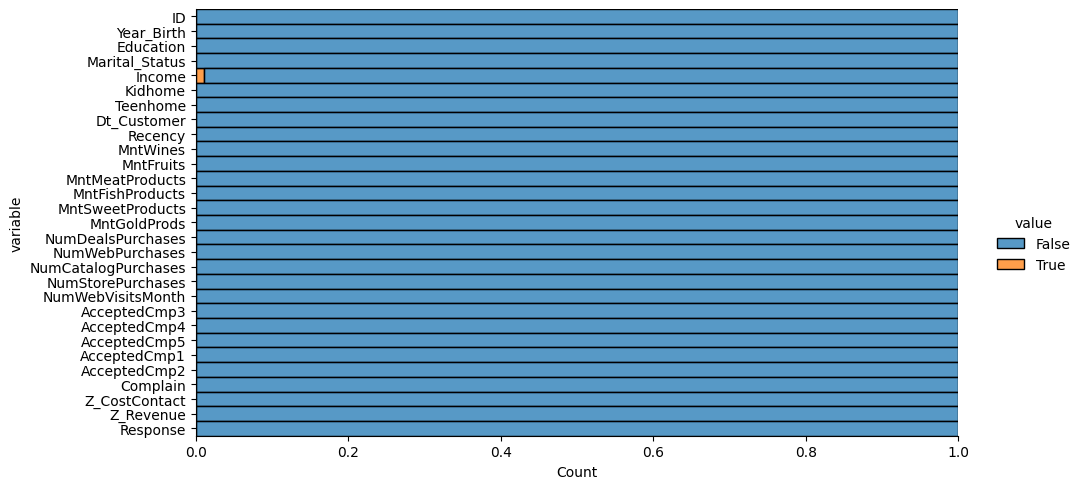

In [10]:
data.isnull().melt().pipe(lambda df: sb.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))

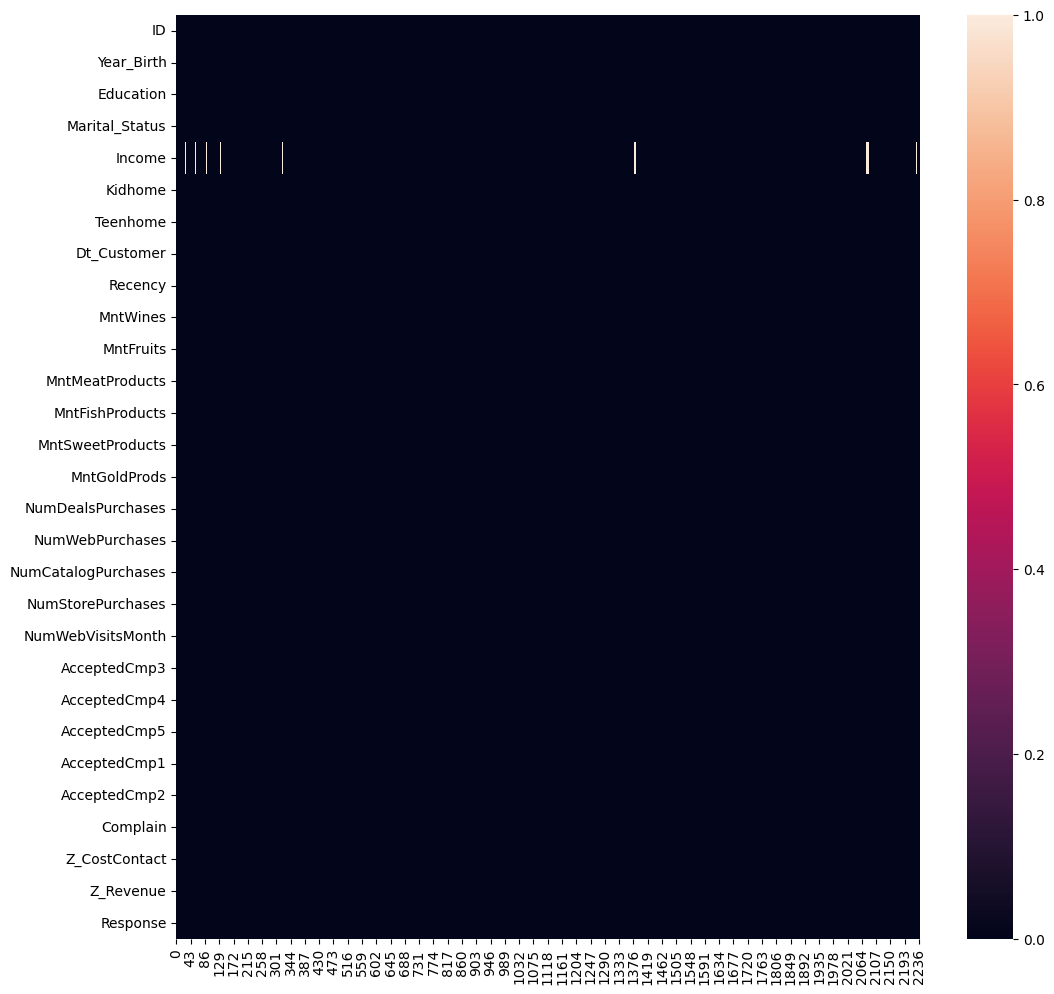

In [11]:
plt.figure(figsize=(12, 12))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df))
plt.show()

In [13]:
# TODO: Manejar los nulos

### Exploracion univariada de los datos

#### Histogramas de frecuencia

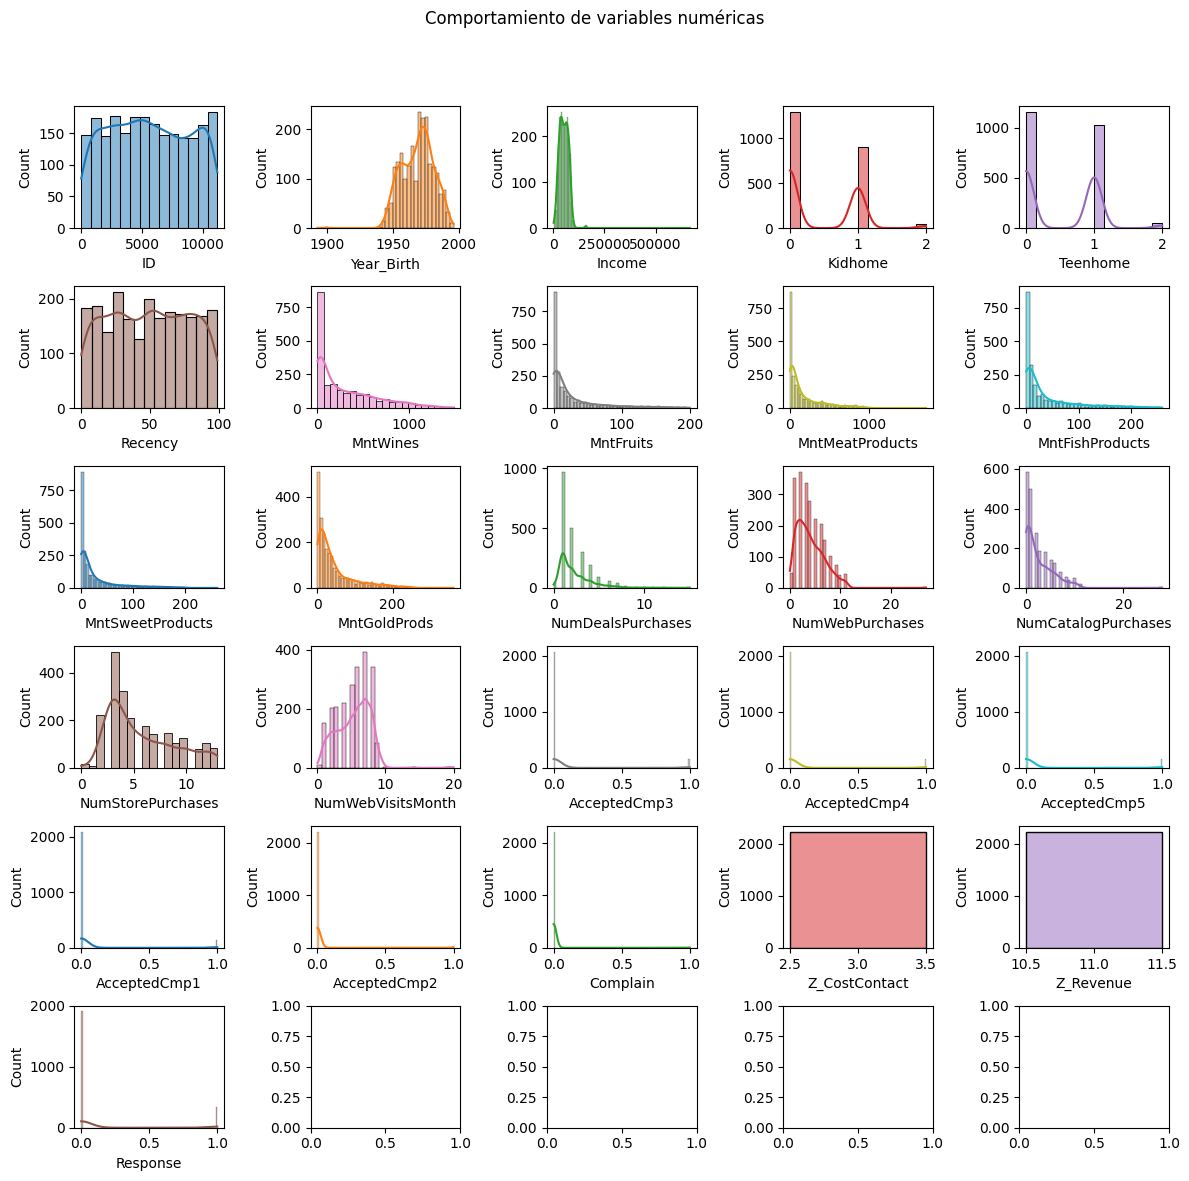

In [19]:
fig, ax = plt.subplots(6, 5, figsize=(12, 12))
ax = ax.flat

num_col = data.select_dtypes(include= ['int64', 'float64']).columns

for i, col in enumerate(num_col):
  sb.histplot(data = data, x = col, kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])

fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Comportamiento de variables numéricas')
plt.show()